# Stroke Prediction

## Features Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements
(Confidential Source) - Use only for educational purposes

## Import necessary libraries

In [3]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [8]:
pip install --no-binary :all: lightgbm

Defaulting to user installation because normal site-packages is not writeable
  Using cached lightgbm-4.4.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [92 lines of output]
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/132.4 kB ? eta -:--:--
           ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/132.4 kB 891.1 kB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 122.9/132.4 kB 1.6 MB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 1.5 MB/s eta 0:00:00
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
  

In [15]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
  Using cached lightgbm-4.4.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
anceled


In [19]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.5 MB/s eta 0:00:00a 0:00:01m


In [21]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 22.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 10.3 MB/s eta 0:00:0000:0100:01


In [23]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00


In [35]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 9.2 MB/s eta 0:00:00:00:0100:01


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, make_scorer
from sklearn.metrics import precision_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import shap
import optuna
from sklearn.feature_selection import SelectFromModel

In [25]:
# Load and preprocess data
df = pd.read_csv('/Users/Zeryan/Documents/5 Github/stroke EDA-Prediction/healthcare-dataset-stroke-data.csv')

In [26]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [27]:
# Impute missing BMI values using a more sophisticated method (e.g., KNN imputer)
from sklearn.impute import KNNImputer


In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_encoded['bmi'] = imputer.fit_transform(df_encoded[['bmi']])

In [29]:
# Feature engineering
df_encoded['age_squared'] = df_encoded['age'] ** 2
df_encoded['bmi_category'] = pd.cut(df_encoded['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df_encoded = pd.get_dummies(df_encoded, columns=['bmi_category'])

In [30]:
# Split features and target
X = df_encoded.drop(['id', 'stroke'], axis=1)
y = df_encoded['stroke']

In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
# Apply SMOTE to handle class imbalance

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [33]:
# Define preprocessing steps
numeric_features = ['age', 'avg_glucose_level', 'bmi', 'age_squared']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [39]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Hist.Grad.Boost' : HistGradientBoostingClassifier(random_state=42)
}


In [46]:
# Define custom scoring metric (weighted average of recall and ROC AUC)
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return (recall * 0.4) + (precision * 0.3) + (f1 * 0.3)

In [48]:
# Hyperparameter tuning using Optuna
def objective(trial, model_class, X, y):
    if model_class == RandomForestClassifier:
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        }
    elif model_class == XGBClassifier:
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        }
    elif model_class == CatBoostClassifier:
        params = {
            'iterations': trial.suggest_int('iterations', 100, 1000),
            'depth': trial.suggest_int('depth', 3, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),
            'border_count': trial.suggest_int('border_count', 32, 255),
            'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
            'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.6, 1.0),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        }


    
    elif model_class == ExtraTreesClassifier:
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
            'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        }

    
    elif model_class == AdaBoostClassifier:
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
        }

    
    elif model_class == HistGradientBoostingClassifier:
        params = {
            'max_iter': trial.suggest_int('max_iter', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 20, 100),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
            'l2_regularization': trial.suggest_loguniform('l2_regularization', 1e-10, 1.0),
        }


    model = model_class(**params, random_state=42,verbose=0)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=StratifiedKFold(n_splits=5), scoring=make_scorer(custom_scorer))
    return scores.mean()

results = {}

for name, model in models.items():
    print(f"\nOptimizing {name}...")
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, type(model), X_train_resampled, y_train_resampled), n_trials=50)
    
    best_params = study.best_params
    best_model = type(model)(**best_params)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(XGBClassifier(random_state=42))),
        ('classifier', best_model)
    ])
    
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)
    
    results[name] = {
        'accuracy': pipeline.score(X_test, y_test),
        'roc_auc': roc_auc_score(y_test, y_pred_proba[:, 1]),
        'recall': recall_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'best_params': best_params,
        'pipeline': pipeline
    }

[I 2024-07-10 02:49:43,213] A new study created in memory with name: no-name-3aaa8c74-c131-48d1-8067-aaf5cdbfaf4c



Optimizing Random Forest...


/Users/Zeryan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Zeryan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/Users/Zeryan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
TypeError: custom_scorer() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/Zeryan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Zeryan/Library/Python/3.9/lib/python/site-p

KeyboardInterrupt: 

In [ ]:
# Print results and select the best model
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"ROC AUC: {result['roc_auc']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("Best Parameters:")
    print(result['best_params'])

best_model = max(results, key=lambda x: results[x]['recall'])
final_model = results[best_model]['pipeline']
final_predictions = final_model.predict(X_test)
final_proba = final_model.predict_proba(X_test)[:, 1]

print("\nFinal Model Evaluation:")
print(f"Model: {best_model}")
print(f"Accuracy: {final_model.score(X_test, y_test):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, final_proba):.4f}")
print(f"Recall: {recall_score(y_test, final_predictions):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_predictions))
print("Classification Report:")
print(classification_report(y_test, final_predictions))

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, final_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, final_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Feature importance analysis using SHAP
explainer = shap.TreeExplainer(final_model.named_steps['classifier'])
shap_values = explainer.shap_values(final_model.named_steps['preprocessor'].transform(X_test))

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP Values)")
plt.show()

In [ ]:
# Learning curve analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring=make_scorer(custom_scorer)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Custom Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


## 1. Data Loading and Initial Exploration

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Body

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## 2. Data Visualization

In [6]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


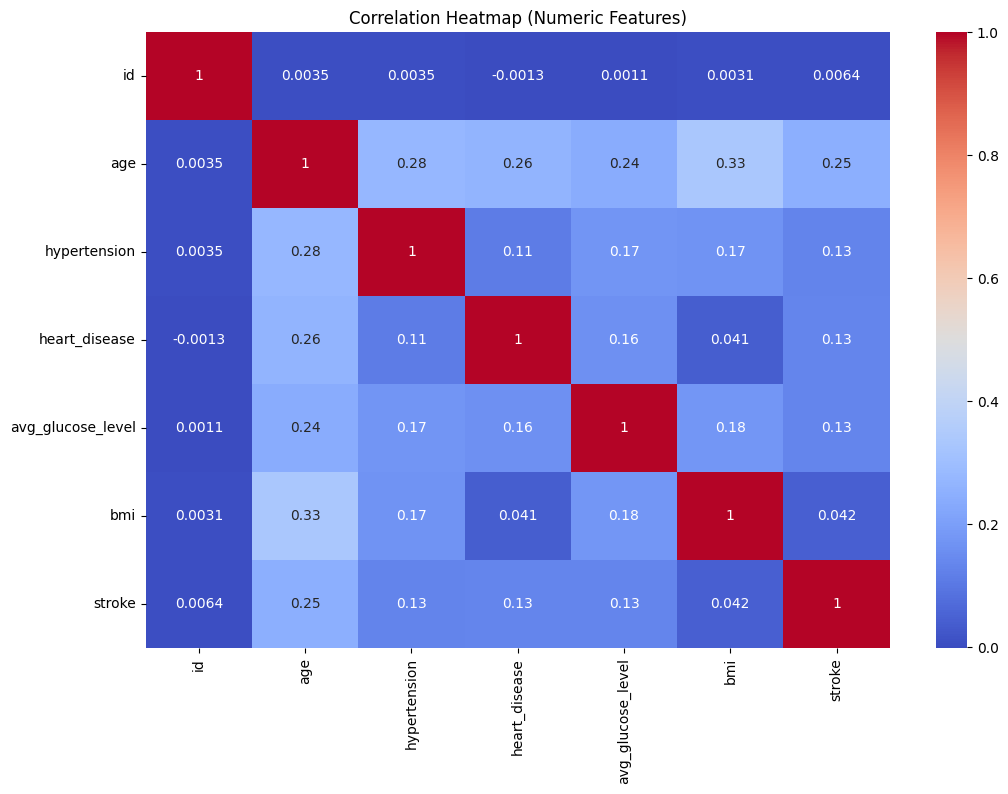

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

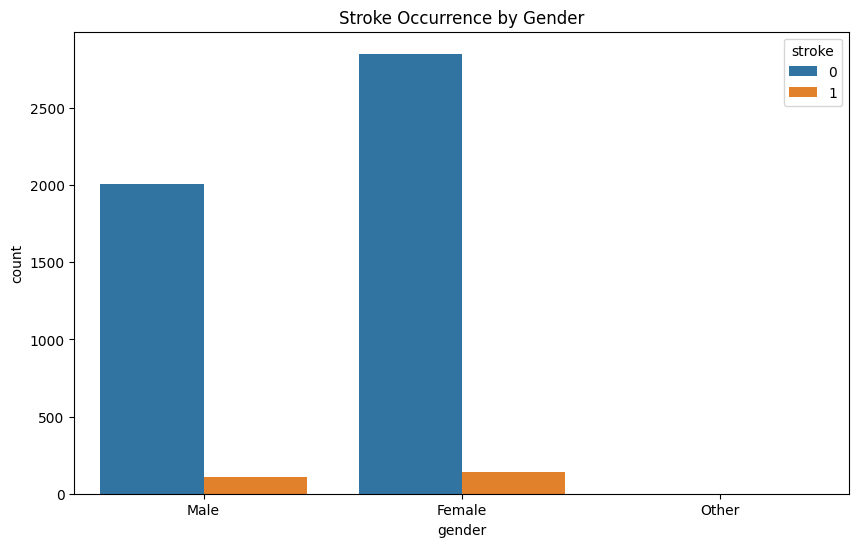

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Occurrence by Gender')
plt.show()

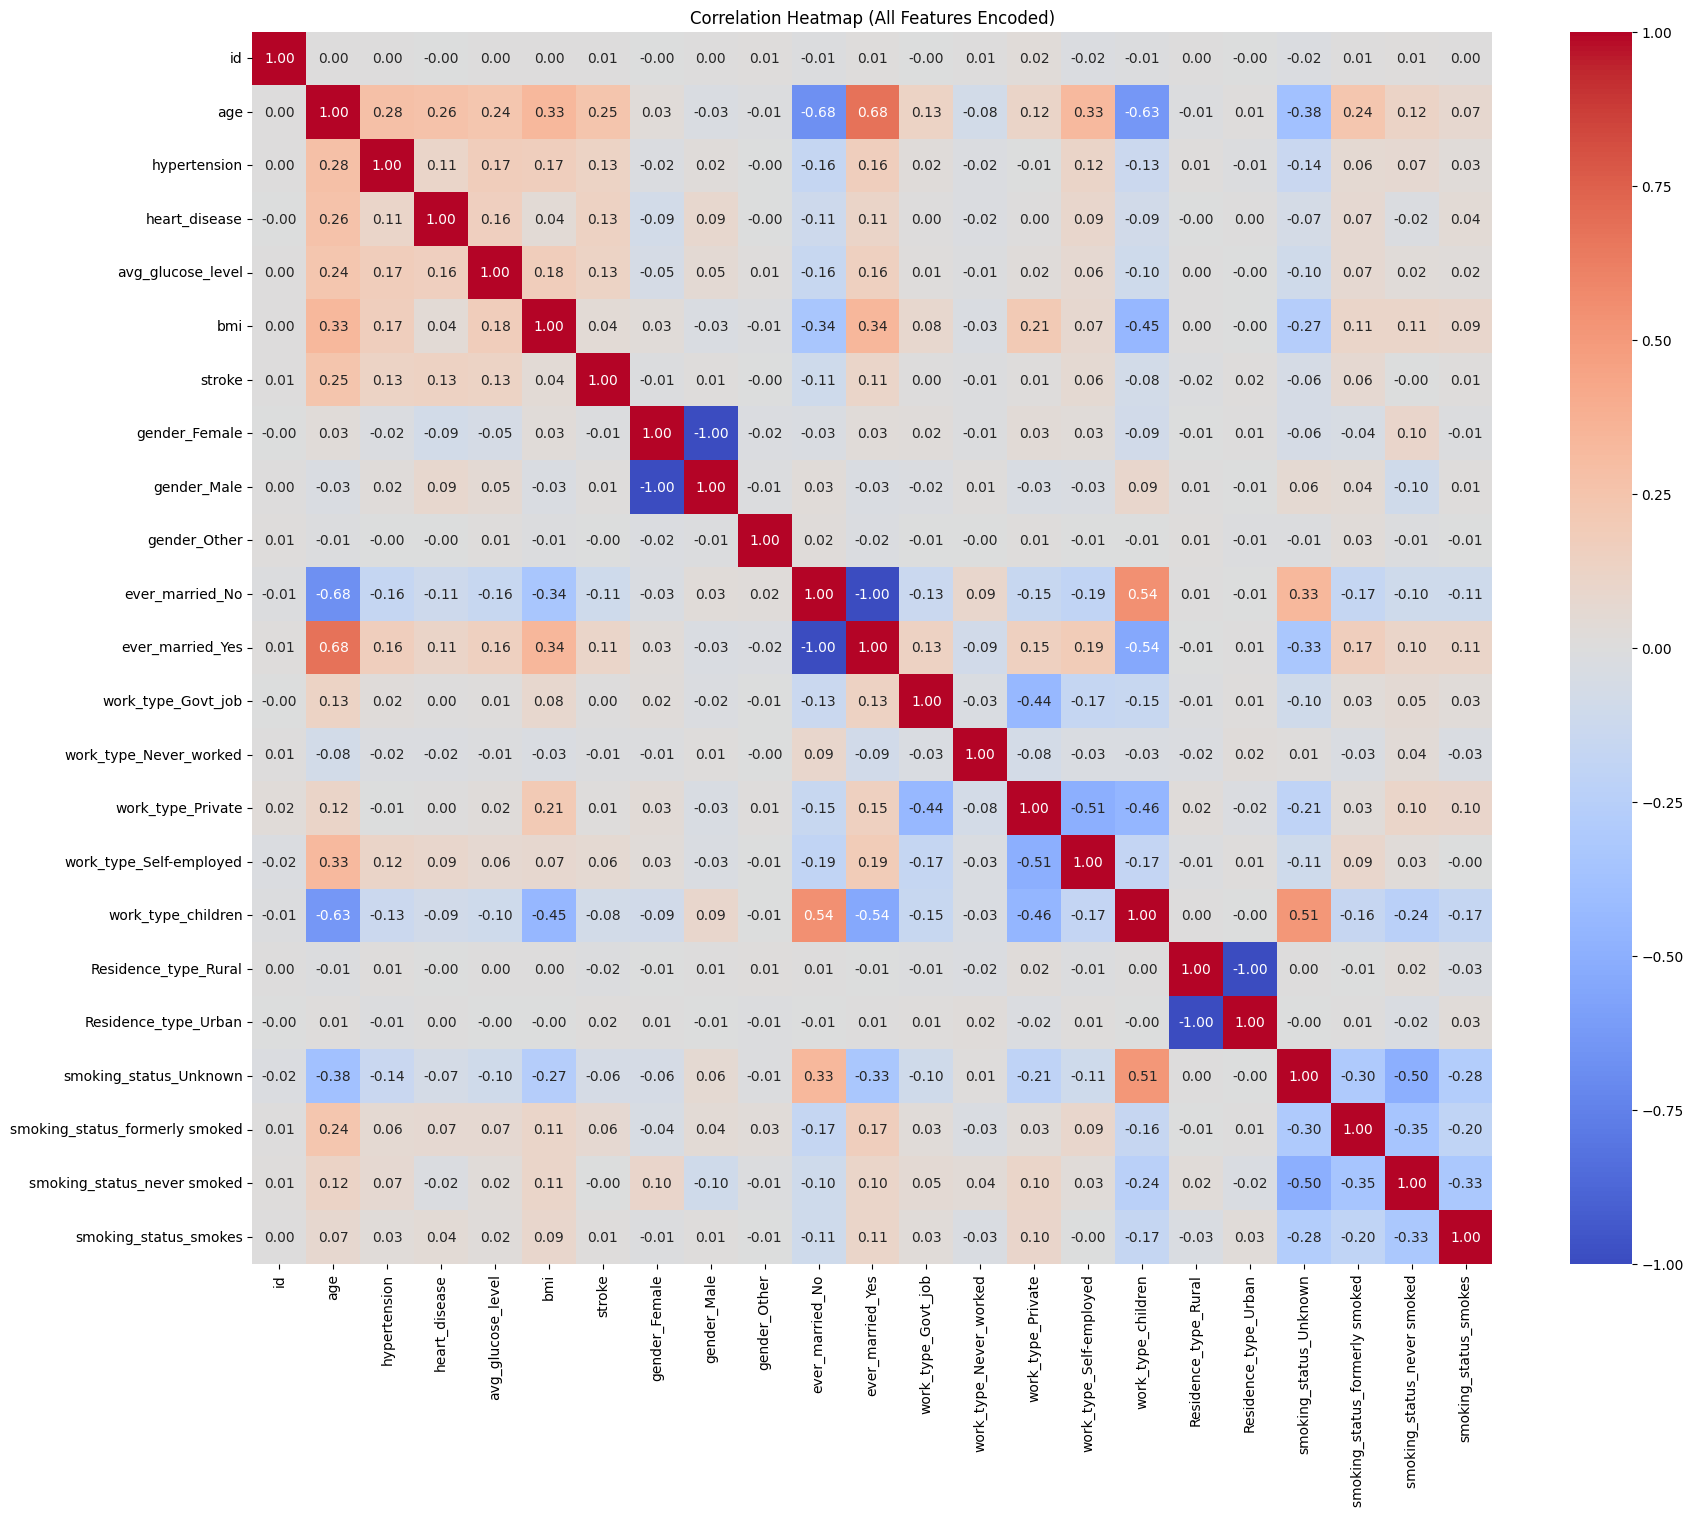

In [9]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Create correlation heatmap with encoded features
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (All Features Encoded)')
plt.show()

In [10]:
# Check for missing values
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## Handling with missing values

We are going to use rest of data to make a linear regression model to predict missing values of bmi

Let´s work in a copy of original database

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
# Let's create a copy to work with
df_imputed = df_encoded.copy()

Let´s identify the features to use for prediction and prepare the data:

In [12]:
# Identify numeric and categorical columns
numeric_columns = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_imputed.select_dtypes(include=['object']).columns.tolist()

# Remove 'bmi' from numeric columns if it's there
if 'bmi' in numeric_columns:
    numeric_columns.remove('bmi')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_imputed, columns=categorical_columns)

# Prepare features (X) and target (y)
X = df_encoded.drop('bmi', axis=1)
y = df_encoded['bmi']

# Split data into rows with BMI and without BMI
X_with_bmi = X[y.notnull()]
y_with_bmi = y[y.notnull()]
X_without_bmi = X[y.isnull()]

Let´s train the linear regression model

In [13]:
# Split the data with BMI into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_bmi, y_with_bmi, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"R-squared score: {score:.4f}")

R-squared score: 0.2084


Let´s use the model to predict missing BMI values:

In [14]:
# Predict BMI for rows with missing values
bmi_predicted = model.predict(X_without_bmi)

# Fill in the predicted values
df_imputed.loc[y.isnull(), 'bmi'] = bmi_predicted

# Verify that there are no more missing values in the 'bmi' column
print(df_imputed['bmi'].isnull().sum())

0


Let´s plot the distribution of original vs imputed BMI values, to check if the imputation looks reasonable:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


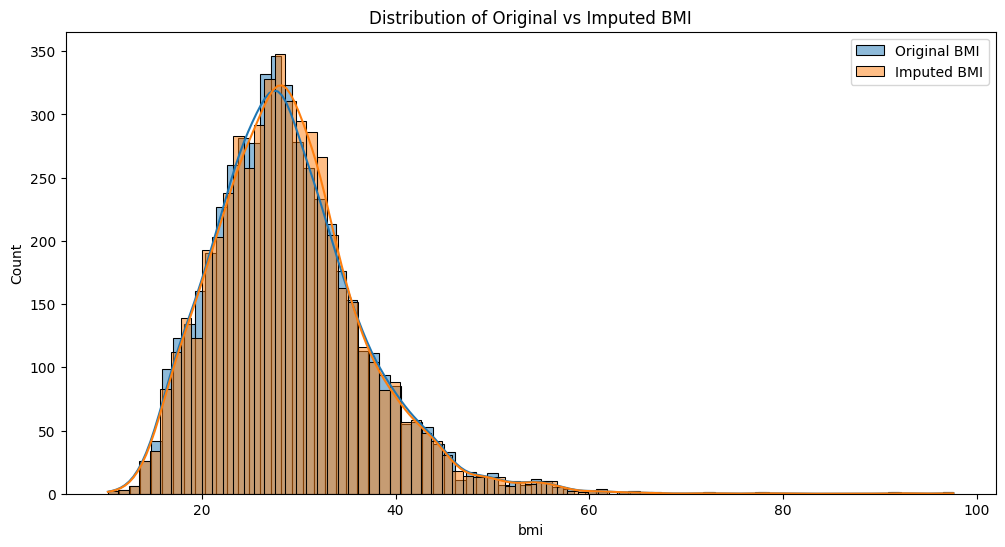

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'].dropna(), kde=True, label='Original BMI')
sns.histplot(df_imputed['bmi'], kde=True, label='Imputed BMI')
plt.legend()
plt.title('Distribution of Original vs Imputed BMI')
plt.show()


Our missing values filling method works perfectly.

Let´s continue with Stroke Prediction:

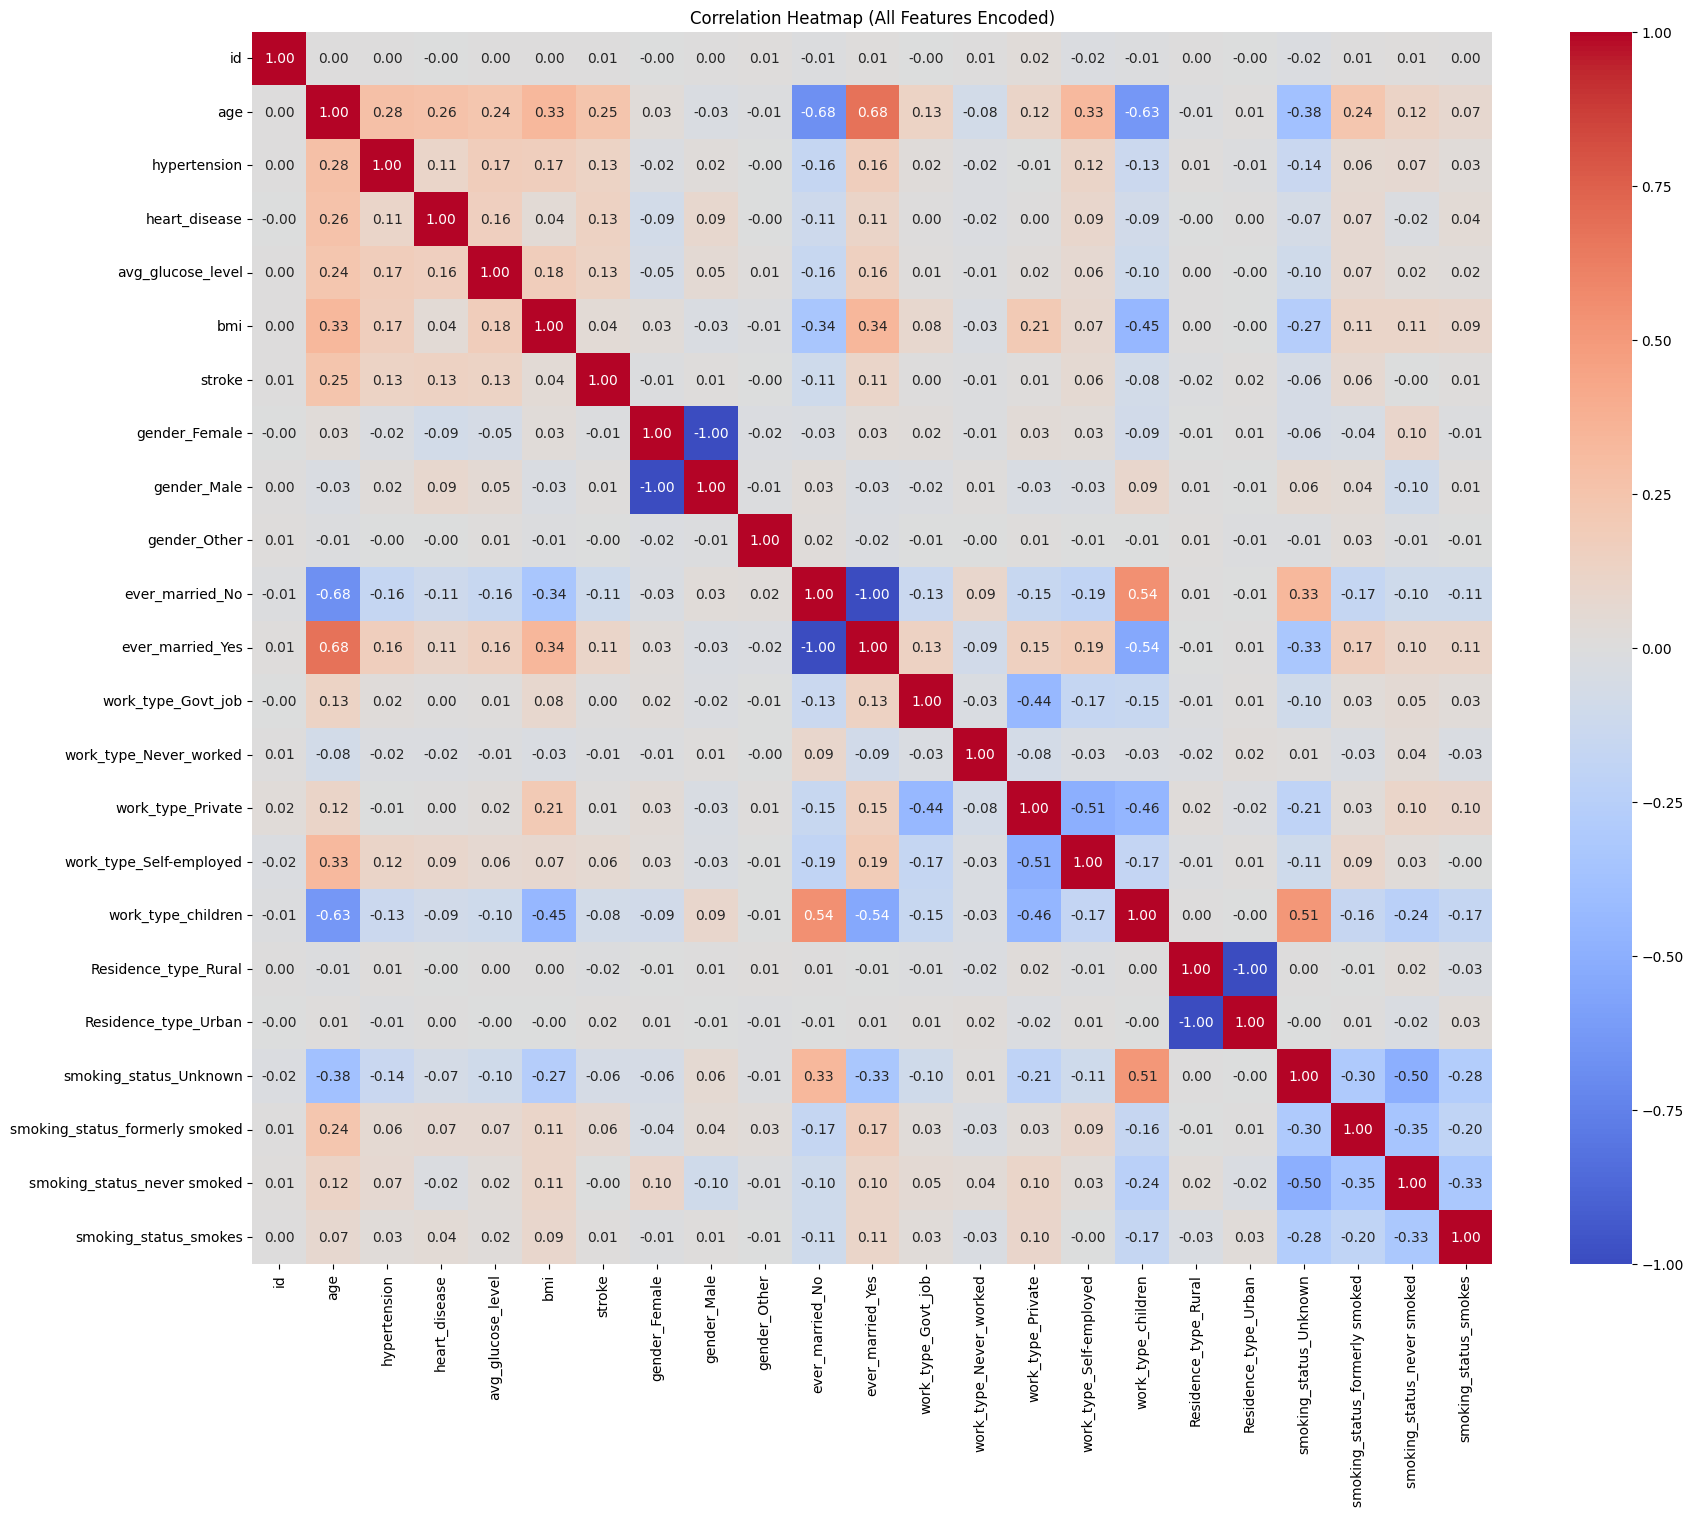

In [16]:
# Updated correlation heatmap with encoded features
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (All Features Encoded)')
plt.show()

In [17]:
df = df_imputed

In [18]:
# Split features and target
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']


In [19]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,31.224806,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False


In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Handling Class Imbalance

SMOTE (Synthetic Minority Over-sampling Technique) Implementation

In [21]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 5. Feature Scaling and Preprocessing Pipeline

In [22]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

## 6. Model Selection and Training

In [23]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [24]:
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        'accuracy': pipeline.score(X_test, y_test),
        'roc_auc': roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [25]:
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"ROC AUC: {result['roc_auc']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])


Random Forest Results:
Accuracy: 0.8718
ROC AUC: 0.8041
Confusion Matrix:
[[867  93]
 [ 38  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       960
           1       0.21      0.39      0.27        62

    accuracy                           0.87      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.91      0.87      0.89      1022


XGBoost Results:
Accuracy: 0.8591
ROC AUC: 0.7726
Confusion Matrix:
[[856 104]
 [ 40  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       960
           1       0.17      0.35      0.23        62

    accuracy                           0.86      1022
   macro avg       0.56      0.62      0.58      1022
weighted avg       0.91      0.86      0.88      1022


LightGBM Results:
Accuracy: 0.8982
ROC AUC: 0.7931
Confusion Matrix:
[[903  57]
 [ 47  15]]
Classification Re

### 8. Feature Importance Analysis

In [26]:
best_model = max(results, key=lambda x: results[x]['roc_auc'])
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', models[best_model])
])
best_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## 10. Final Model Evaluation

In [27]:
final_model = best_pipeline
final_predictions = final_model.predict(X_test)
final_proba = final_model.predict_proba(X_test)[:, 1]

print("\nFinal Model Evaluation:")
print(f"Accuracy: {final_model.score(X_test, y_test):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, final_proba):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_predictions))
print("Classification Report:")
print(classification_report(y_test, final_predictions))


Final Model Evaluation:
Accuracy: 0.8718
ROC AUC: 0.8041
Confusion Matrix:
[[867  93]
 [ 38  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       960
           1       0.21      0.39      0.27        62

    accuracy                           0.87      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.91      0.87      0.89      1022



## 11. ROC Curve Visualization

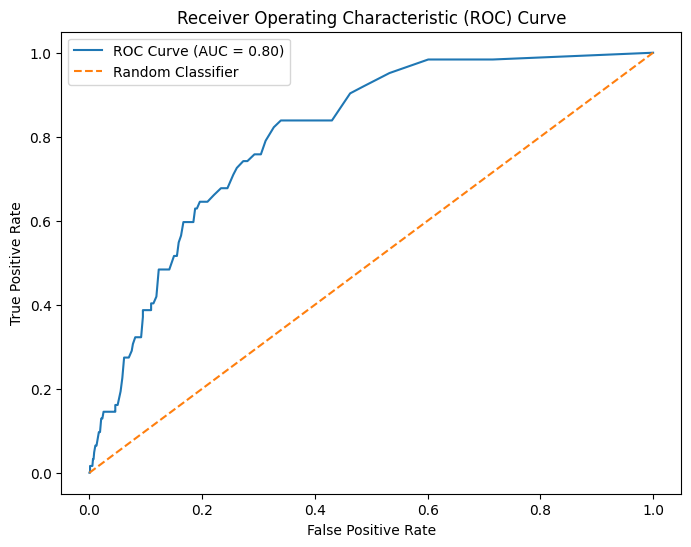

In [28]:

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, final_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, final_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()